# A Machine Learning Analysis of Virginia Restaurant Reviews: Future Failure or Potential Phenomenon?
## Using Sentiment Analysis and Machine Learning to Forecast Restaurant Closure.
## Rahul Zalkikar - University of Virginia


In [69]:
# Imports
import pandas as pd
import re
import seaborn
import string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, auc, classification_report
from sklearn.svm import SVC
from sklearn import naive_bayes
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rayzc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rayzc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
yelp_businesses = pd.read_csv(r'C:\Users\rayzc\Downloads\yelp_business_data.csv')
yelp_reviews = pd.read_csv(r'C:\Users\rayzc\Downloads\yelp_review_data.csv')
yelp_businesses = yelp_businesses.drop(columns=['name','neighborhood','address','city','state','postal_code','latitude','longitude'])
yelp_businesses.head()

,business_id,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [4]:
yelp_businesses['is_restaurant'] = [bool(re.search("Restaurant", i)) for i in yelp_businesses.categories]
yelp_restaurants = yelp_businesses.loc[yelp_businesses['is_restaurant'] == True]
yelp_restaurants.head()

,business_id,stars,review_count,is_open,categories,is_restaurant
4,PfOCPjBrlQAnz__NXj9h_w,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,True
5,o9eMRCWt5PkpLDE0gOPtcQ,4.0,5,1,Italian;Restaurants,True
10,XOSRcvtaKc_Q5H1SAzN20A,4.5,3,0,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...,True
14,fNMVV_ZX7CJSDWQGdOM8Nw,3.5,7,1,Restaurants;American (Traditional),True
15,l09JfMeQ6ynYs5MCJtrcmQ,3.0,12,0,Italian;French;Restaurants,True


In [5]:
yelp_data = pd.merge(yelp_reviews, yelp_restaurants, on='business_id')
yelp_data.head()

,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,stars_y,review_count,is_open,categories,is_restaurant
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,4.0,84,1,Diners;Food;Restaurants;Delis,True
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,2016-02-22,*The shop was featured on Mind of a Chef with ...,4,3,4,4.0,84,1,Diners;Food;Restaurants;Delis,True
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,2013-03-29,"As its name suggests, Wilensky's is a lunch co...",9,0,3,4.0,84,1,Diners;Food;Restaurants;Delis,True
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,2017-08-08,"Stopped by for the Wilensky's Special, loved i...",0,0,0,4.0,84,1,Diners;Food;Restaurants;Delis,True
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,2009-01-17,"I have to admit, I am a fan. Just entering the...",4,0,1,4.0,84,1,Diners;Food;Restaurants;Delis,True


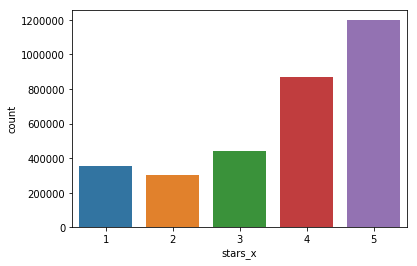

In [6]:
seaborn.countplot(x='stars_x',data=yelp_data)

This indicates that most reviews are relatively positive (4 or 5), and that bad reviews are less common.

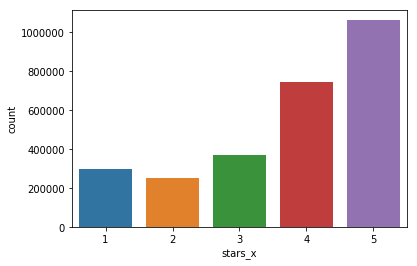

In [7]:
seaborn.countplot(x='stars_x',data=yelp_data[yelp_data['is_open'] == 1])

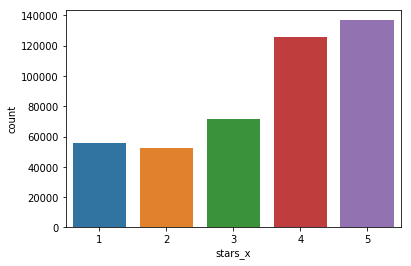

In [8]:
seaborn.countplot(x='stars_x',data=yelp_data[yelp_data['is_open'] == 0])

The similar distribution of star counts seen through these bar charts indicates that most reviews are relatively positive (4 or 5) for both closed (failed) and open (successful) restaurants. Therefore, it seems as though star counts for reviews might not be a useful feature for predicting whether a restaurant will close in the future. 

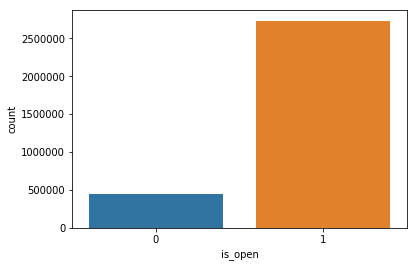

In [9]:
seaborn.countplot(x='is_open',data=yelp_data)

This indicates that appropriate class weighting will be needed in SVM, as there are many more open businesses than closed businesses in our dataset.

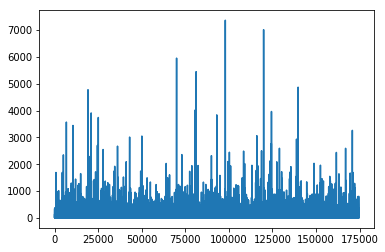

In [10]:
plt.plot(yelp_restaurants['review_count'])

This indicates that some businesses have a lot more reviews than most others, and skew the average number of reviews per business. This could be good (more data about local businesses in general) or bad (biased data that caters to certain local businesses which have a lot of reviews). 

In [11]:
# Add column for review length
yelp_data['length'] = yelp_data['text'].apply(len)
yelp_data.head()

,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,stars_y,review_count,is_open,categories,is_restaurant,length
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,4.0,84,1,Diners;Food;Restaurants;Delis,True,213
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,2016-02-22,*The shop was featured on Mind of a Chef with ...,4,3,4,4.0,84,1,Diners;Food;Restaurants;Delis,True,998
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,2013-03-29,"As its name suggests, Wilensky's is a lunch co...",9,0,3,4.0,84,1,Diners;Food;Restaurants;Delis,True,794
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,2017-08-08,"Stopped by for the Wilensky's Special, loved i...",0,0,0,4.0,84,1,Diners;Food;Restaurants;Delis,True,270
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,2009-01-17,"I have to admit, I am a fan. Just entering the...",4,0,1,4.0,84,1,Diners;Food;Restaurants;Delis,True,863


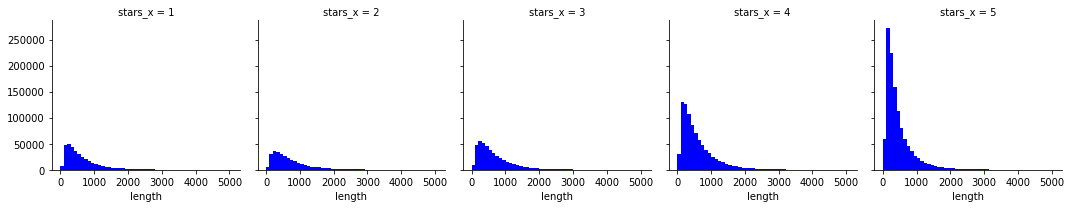

In [12]:
# Review length vs stars
graph = seaborn.FacetGrid(data=yelp_data,col='stars_x')
graph.map(plt.hist,'length',bins=50,color='blue')

These charts provide key insight into using the length of a review as a feature. It shows that review counts follow a logarithmic distribution for each star rating, and that most reviews fall between 0-1000 in length for each star rating. 

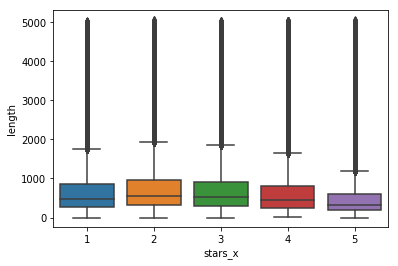

In [13]:
seaborn.boxplot(x='stars_x', y='length', data=yelp_data)

It seems as though the star ratings have approximately the same mean and quartile review lengths associated with them, despite many outliers across the board, and especially amongst 5 star reviews. Therefore, text length might not be a particularly useful feature to consider in our classification model, and we will proceed by using review sentiment as our primary feature. 

In [14]:
# Subset data for classification: 1 star - Bad review, 3 stars - Neutral Review, 5 stars - Good review
yelp_data_classes = yelp_data[(yelp_data['stars_x']==1) | (yelp_data['stars_x']==3) | (yelp_data['stars_x']==5)]
yelp_data_classes.head()
print(yelp_data_classes.shape)

(1999382, 15)


In [15]:
# Cleaning: Remove stopwords, punctuation, and word stems
ps = PorterStemmer() 

def text_process(text):
    cleaned_words = []
    words = word_tokenize(text)
    for w in words: 
        w = re.sub(r'[^\w\s]','',w) # punctuation
        w = w.replace(',', '') # extra commas
        cleaned_words.append(ps.stem(w)) # word stems
    cleaned_words = filter(None, cleaned_words) # empty strings
    return [word for word in cleaned_words if word.lower() not in stopwords.words('english')] # stopwords

In [96]:
# Seperate the dataset into X and Y for prediction - using 5000 obs. to speed up runtime for now
x = yelp_data_classes['text'][0:5000]
y = yelp_data_classes['is_open'][0:5000]
print(x.head())
print(y.head())

0    Super simple place but amazing nonetheless. It...
1    *The shop was featured on Mind of a Chef with ...
2    As its name suggests, Wilensky's is a lunch co...
3    Stopped by for the Wilensky's Special, loved i...
5    Went here while visiting Montreal. It was grea...
Name: text, dtype: object
0    1
1    1
2    1
3    1
5    1
Name: is_open, dtype: int64


In [97]:
# Vectorize while cleaning
vector = CountVectorizer(analyzer=text_process).fit(x)
print(len(vector.vocabulary_))

14432


In [100]:
# Sparse Matrix
x = vector.transform(x)
print("Shape of the matrix: ", x.shape)
print("Non-Zero occurrences: ",x.nnz)
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the matrix:  (5000, 14432)
Non-Zero occurrences:  265417
Density of the matrix =  0.3678173503325942


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search_svc = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search_svc.fit(x_train, y_train)

NameError: name 'grid_search' is not defined

In [35]:
# Optimal Parameters for SVM
print(grid_search_svc.best_params_)

{'C': 10, 'gamma': 0.001}


In [102]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
optimal_svm = SVC(random_state=42, C = grid_search_svc.best_params_['C'], gamma = grid_search_svc.best_params_['gamma'])
y_score = optimal_svm.fit(x_train, y_train).decision_function(x_test)
# Compute Cross Validation Scores
cv_results = cross_validate(optimal_svm, x_train, y_train, cv=5, return_train_score=False)
print("SVM Results:")
print("Cross Validation Scores: ", cv_results['test_score'])
print("Avg Cross Validation Score: ", sum(cv_results['test_score'])/5)
# Other Metrics
y_predict = optimal_svm.fit(x_train, y_train).predict(x_test)
print("AUC-ROC: ", roc_auc_score(y_test, y_score))
print("\nConfusion Matrix for Support Vector Machine:")
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
print("Metrics:")
print("Accuracy: ", accuracy_score(y_test, y_predict))
print("Precision: ", precision_score(y_test, y_predict))
print("Recall: ", recall_score(y_test, y_predict))
print("F1-Score: ", f1_score(y_test, y_predict))

SVM Results:
Cross Validation Scores:  [0.9525593  0.95625    0.955      0.95375    0.96370463]
Avg Cross Validation Score:  0.9562527863324787
AUC-ROC:  0.9059594524793388

Confusion Matrix for Support Vector Machine:
[[  6  26]
 [  1 967]]
              precision    recall  f1-score   support

           0       0.86      0.19      0.31        32
           1       0.97      1.00      0.99       968

   micro avg       0.97      0.97      0.97      1000
   macro avg       0.92      0.59      0.65      1000
weighted avg       0.97      0.97      0.96      1000

Metrics:
Accuracy:  0.973
Precision:  0.973816717019134
Recall:  0.9989669421487604
F1-Score:  0.9862315145334014


For classification with SVM, we will subset the data into bad reviews (1 star), neutral reviews (3 stars), and good reviews (5 stars). The first step is to clean the data by removing stop-words, punctuation, and word stems as defined by conventional NLP practices and the standard NLTK package in Python. We will be using a bag-of-words approach with vectorized unigrams (single words) to train our SVM model. After vectorizing the reviews, we obtained a sparse matrix with a shape of (5000, 14432) and density of 0.368. We split our word vectors into a training set of 80% of the data and a testing set of 20% of the data. After fitting the SVM algorithm on our training data and grid searching for optimal hyperparameters, we obtained impressive benchmark results when predicting restaurant closure from testing data.

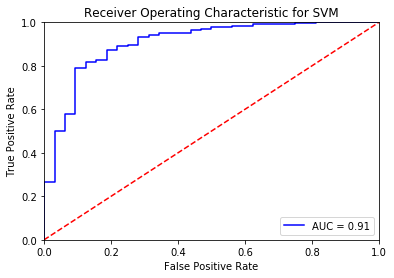

In [88]:
# ROC Curve for SVM
# Calculate the fpr and tpr for all thresholds of the classification
optimal_svm = SVC(random_state=42, C = grid_search_svc.best_params_['C'], gamma = grid_search_svc.best_params_['gamma'], probability = True)
probs = optimal_svm.fit(x_train, y_train).predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

For comparison with our SVM model, we decided to train classic Naive Bayes variants used in text classification (Multinomial, Complement, Bernoulli) and obtained similar results. However, our SVM model outperformed these variants in accuracy and f1-score.

In [82]:
# Naive Bayes - Multinomial, Complement, Bernoulli - classic naive Bayes variants used in text classification 
naive_multi = naive_bayes.MultinomialNB()
naive_compl = naive_bayes.ComplementNB()
naive_bern = naive_bayes.BernoulliNB()
naive_multi.fit(x_train,y_train)
naive_compl.fit(x_train,y_train)
naive_bern.fit(x_train,y_train)

predictions_multi = naive_multi.predict(x_test)
predictions_compl = naive_compl.predict(x_test)
predictions_bern = naive_bern.predict(x_test)

print("Naive Bayes (Multinomial) Results:")
print("Accuracy: ",accuracy_score(predictions_multi, y_test))
print("Precision: ",precision_score(predictions_multi, y_test))
print("Recall: ",recall_score(predictions_multi, y_test))
print("F1-Score: ",f1_score(predictions_multi, y_test))
print("\nNaive Bayes (Complement) Results:")
print("Accuracy: ",accuracy_score(predictions_compl, y_test))
print("Precision: ",precision_score(predictions_compl, y_test))
print("Recall: ",recall_score(predictions_compl, y_test))
print("F1-Score: ",f1_score(predictions_compl, y_test))
print("\nNaive Bayes (Bernoulli) Results:")
print("Accuracy: ",accuracy_score(predictions_bern, y_test))
print("Precision: ",precision_score(predictions_bern, y_test))
print("Recall: ",recall_score(predictions_bern, y_test))
print("F1-Score: ",f1_score(predictions_bern, y_test))

Naive Bayes (Multinomial) Results:
Accuracy:  0.964
Precision:  0.9907024793388429
Recall:  0.9726166328600405
F1-Score:  0.9815762538382804

Naive Bayes (Complement) Results:
Accuracy:  0.964
Precision:  0.9886363636363636
Recall:  0.9745417515274949
F1-Score:  0.9815384615384616

Naive Bayes (Bernoulli) Results:
Accuracy:  0.934
Precision:  0.9628099173553719
Recall:  0.9688149688149689
F1-Score:  0.9658031088082901
